In [1]:
# read the final_artist_data.csv
import pandas as pd
import numpy as np
import regex as re
import ast
import networkx as nx
import  matplotlib.pyplot as plt

# Read and Transform the data

In [2]:
df = pd.read_csv('final_artist_data.csv')

In [3]:
# check the missing data
print(df.isnull().sum())

# drop the row with null data in artist
df = df.dropna(subset=['artist'])

id                            0
artist                        1
aggregated_values             0
collaborated_artist           0
collaborated_artist_id        0
spotify_id                    0
followers                     0
popularity                    0
genres                        0
chart_hits                14662
dtype: int64


In [4]:
columns_to_convert = ['aggregated_values', 'collaborated_artist', 'collaborated_artist_id', 'genres', 'chart_hits']

In [5]:
def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        # Optionally, you could handle or log the error here
        return s  # Return the original string if conversion fails

# Apply the conversion to each specified column
for col in columns_to_convert:
    df[col] = df[col].apply(safe_literal_eval)

In [6]:
df.head()

,id,artist,aggregated_values,collaborated_artist,collaborated_artist_id,spotify_id,followers,popularity,genres,chart_hits
0,4q3ewBCX7sLwd24euuV69X,Bad Bunny,"{'before': {'duration_ms': 269939.7, 'danceabi...","{'before': [('Arcangel', 9), ('Farruko', 8), (...","{'before': [('4SsVbpTthjScTS7U2hmr1X', 9), ('3...",4q3ewBCX7sLwd24euuV69X,55669387.0,100,"[reggaeton, trap latino]","[us (76), gb (1), ar (91), au (2), at (5), be ..."
1,3TVXtAsR1Inumwj472S9r4,Drake,"{'before': {'duration_ms': 257753.68852459016,...","{'before': [('Lil Wayne', 24), ('Future', 11),...","{'before': [('55Aa2cqylxrFIXC767Z865', 24), ('...",3TVXtAsR1Inumwj472S9r4,66852536.0,95,"[canadian hip hop, canadian pop, hip hop, rap,...","[us (190), gb (163), ar (18), au (148), at (97..."
2,06HL4z0CvFAxyc27GXpf02,Taylor Swift,"{'before': {'duration_ms': 244581.15277777778,...","{'before': [('Ed Sheeran', 3), ('Colbie Cailla...","{'before': [('6eUKZXaKkcviH0Ku9w2n3V', 3), ('6...",06HL4z0CvFAxyc27GXpf02,58554324.0,94,[pop],"[us (136), gb (115), ar (24), au (110), at (36..."
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"{'before': {'duration_ms': 275620.0777777778, ...","{'before': [('Ariana Grande', 4), ('Daft Punk'...","{'before': [('66CXWjxzNUsdJxJ2JdwvnR', 4), ('4...",1Xyo4u8uXC1ZmMpatF05PJ,49387909.0,93,"[canadian contemporary r&b, canadian pop, pop]","[us (81), gb (74), ar (23), au (76), at (61), ..."
4,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"{'before': {'duration_ms': 251356.83139534883,...","{'before': [('JAY-Z', 24), ('Big Sean', 8), ('...","{'before': [('3nFkdlSjzX9mRTtwJOzDYB', 24), ('...",5K4W6rqBFWDnAN6FQUkS6x,18170307.0,91,"[chicago rap, rap]","[us (89), gb (84), ar (3), au (81), at (42), b..."


# Exploratory Data Analysis

1. When is this before and after? - 2018 actually but regard it as 2019
2. Create dataframe of before and after separately

In [7]:
df.shape

(25924, 10)

In [8]:
df.iloc[1654:1660]

,id,artist,aggregated_values,collaborated_artist,collaborated_artist_id,spotify_id,followers,popularity,genres,chart_hits
1654,6VD4UEUPvtsemqD3mmTqCR,Deorro,"{'before': {'duration_ms': 228085.57142857142,...","{'before': [('Chris Brown', 4), ('Adrian Delga...","{'before': [('7bXgB6jMjp9ATFy66eO08Z', 4), ('0...",6VD4UEUPvtsemqD3mmTqCR,1195407.0,66,"[dance pop, edm, electro house, melbourne boun...","[us (1), gb (1), ar (3), au (1), at (4), be (3..."
1655,4tMm1dU6Gn04VAZ9ClHcIZ,Jacquees,"{'before': {'duration_ms': 232277.0, 'danceabi...","{'before': [('DeJ Loaf', 1)], 'after': [('DeJ ...","{'before': [('7kFfY4UjNdNyaeUgLIEbIF', 1)], 'a...",4tMm1dU6Gn04VAZ9ClHcIZ,2227161.0,66,"[atl hip hop, pop r&b, pop rap, r&b, rap, urba...",[za (1)]
1656,22hWz22JAmIhIEp0u1X01L,DUSTY LOCANE,"{'before': {'duration_ms': nan, 'danceability'...","{'before': [], 'after': []}","{'before': [], 'after': []}",22hWz22JAmIhIEp0u1X01L,319296.0,66,[new york drill],"[us (1), au (1), be (1), bg (2), ca (1), cy (1..."
1657,5NNlkZBrBpOJ7C11JwVxIj,PXNDX,"{'before': {'duration_ms': 223127.18, 'danceab...","{'before': [], 'after': []}","{'before': [], 'after': []}",5NNlkZBrBpOJ7C11JwVxIj,1174798.0,66,"[emo mexicano, mexican pop punk, mexican rock,...",[mx (1)]
1658,4maKTxhTIDEnWKra7wEIMR,MC Menor da VG,"{'before': {'duration_ms': nan, 'danceability'...","{'before': [], 'after': [('Mc Kadu', 1), ('Mc ...","{'before': [], 'after': [('21ELc2P2rA3Cu6xw3VW...",4maKTxhTIDEnWKra7wEIMR,1704001.0,66,"[funk carioca, funk mtg, funk ostentacao, funk...","[br (1), pt (1)]"
1659,62DmErcU7dqZbJaDqwsqzR,Popcaan,"{'before': {'duration_ms': 215788.54545454544,...","{'before': [('Jamie xx', 2), ('Young Thug', 2)...","{'before': [('7A0awCXkE1FtSU8B0qwOJQ', 2), ('5...",62DmErcU7dqZbJaDqwsqzR,793612.0,66,"[dancehall, jamaican hip hop, reggae fusion, t...","[gb (1), ca (1)]"


In [9]:
df['aggregated_values'][0]

{'before': {'duration_ms': 269939.7,
  'danceability': 0.749275,
  'energy': 0.645775,
  'key': 4.425,
  'loudness': -5.72145,
  'mode': 0.5,
  'speechiness': 0.11958250000000001,
  'acousticness': 0.311484,
  'instrumentalness': 0.00039630100000000005,
  'liveness': 0.1890075,
  'valence': 0.46799999999999997,
  'tempo': 123.92559999999999},
 'after': {'duration_ms': 224888.42281879194,
  'danceability': 0.7423288590604027,
  'energy': 0.6803691275167785,
  'key': 5.771812080536913,
  'loudness': -5.760026845637583,
  'mode': 0.42953020134228187,
  'speechiness': 0.1251718120805369,
  'acousticness': 0.21617986577181209,
  'instrumentalness': 0.00012831308724832216,
  'liveness': 0.16037449664429532,
  'valence': 0.5257637583892619,
  'tempo': 123.71074496644295}}

In [10]:
def extract_all_fields(row, part):
    fields = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    results = {}
    for field in fields:
        pattern = rf"'{part}':.*?'{field}': ([\d.+-]+)"
        match = re.search(pattern, row)
        if match:
            try:
                results[f"{part}_{field}"] = float(match.group(1))
            except ValueError:
                results[f"{part}_{field}"] = None
    return results

In [11]:
# Apply the extraction function for 'before' and 'after' parts
df['aggregated_values'] = df['aggregated_values'].astype(str).fillna('')

for part in ['before', 'after']:
    extracted_data = df['aggregated_values'].apply(lambda x: extract_all_fields(x, part))
    for key in extracted_data.apply(lambda x: x.keys()).iloc[0]:
        df[key] = extracted_data.apply(lambda x: x.get(key))

In [12]:
df.head()

,id,artist,aggregated_values,collaborated_artist,collaborated_artist_id,spotify_id,followers,popularity,genres,chart_hits,...,after_energy,after_key,after_loudness,after_mode,after_speechiness,after_acousticness,after_instrumentalness,after_liveness,after_valence,after_tempo
0,4q3ewBCX7sLwd24euuV69X,Bad Bunny,"{'before': {'duration_ms': 269939.7, 'danceabi...","{'before': [('Arcangel', 9), ('Farruko', 8), (...","{'before': [('4SsVbpTthjScTS7U2hmr1X', 9), ('3...",4q3ewBCX7sLwd24euuV69X,55669387.0,100,"[reggaeton, trap latino]","[us (76), gb (1), ar (91), au (2), at (5), be ...",...,0.680369,5.771812,-5.760027,0.429530,0.125172,0.216180,0.000128,0.160374,0.525764,123.710745
1,3TVXtAsR1Inumwj472S9r4,Drake,"{'before': {'duration_ms': 257753.68852459016,...","{'before': [('Lil Wayne', 24), ('Future', 11),...","{'before': [('55Aa2cqylxrFIXC767Z865', 24), ('...",3TVXtAsR1Inumwj472S9r4,66852536.0,95,"[canadian hip hop, canadian pop, hip hop, rap,...","[us (190), gb (163), ar (18), au (148), at (97...",...,0.544596,4.340426,-6.821021,0.468085,0.192762,0.180939,0.000641,0.162594,0.418132,113.630596
2,06HL4z0CvFAxyc27GXpf02,Taylor Swift,"{'before': {'duration_ms': 244581.15277777778,...","{'before': [('Ed Sheeran', 3), ('Colbie Cailla...","{'before': [('6eUKZXaKkcviH0Ku9w2n3V', 3), ('6...",06HL4z0CvFAxyc27GXpf02,58554324.0,94,[pop],"[us (136), gb (115), ar (24), au (110), at (36...",...,0.552077,4.538462,-7.951590,0.910256,0.056073,0.453282,0.004727,0.128874,0.430833,123.683667
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"{'before': {'duration_ms': 275620.0777777778, ...","{'before': [('Ariana Grande', 4), ('Daft Punk'...","{'before': [('66CXWjxzNUsdJxJ2JdwvnR', 4), ('4...",1Xyo4u8uXC1ZmMpatF05PJ,49387909.0,93,"[canadian contemporary r&b, canadian pop, pop]","[us (81), gb (74), ar (23), au (76), at (61), ...",...,0.687143,4.761905,-6.046476,0.428571,0.078367,0.178426,0.000689,0.173471,0.330857,134.170619
4,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"{'before': {'duration_ms': 251356.83139534883,...","{'before': [('JAY-Z', 24), ('Big Sean', 8), ('...","{'before': [('3nFkdlSjzX9mRTtwJOzDYB', 24), ('...",5K4W6rqBFWDnAN6FQUkS6x,18170307.0,91,"[chicago rap, rap]","[us (89), gb (84), ar (3), au (81), at (42), b...",...,0.563750,4.375000,-5.951500,0.375000,0.265512,0.158981,1.677500,0.237463,0.287087,129.305875


In [13]:
df.columns

Index(['id', 'artist', 'aggregated_values', 'collaborated_artist',
       'collaborated_artist_id', 'spotify_id', 'followers', 'popularity',
       'genres', 'chart_hits', 'before_duration_ms', 'before_danceability',
       'before_energy', 'before_key', 'before_loudness', 'before_mode',
       'before_speechiness', 'before_acousticness', 'before_instrumentalness',
       'before_liveness', 'before_valence', 'before_tempo',
       'after_duration_ms', 'after_danceability', 'after_energy', 'after_key',
       'after_loudness', 'after_mode', 'after_speechiness',
       'after_acousticness', 'after_instrumentalness', 'after_liveness',
       'after_valence', 'after_tempo'],
      dtype='object')

In [14]:
artist_before  = df[['id', 'artist', 'genres', 'chart_hits', 'before_duration_ms', 'before_danceability', 'before_energy', 'before_key', 'before_loudness', 'before_mode', 'before_speechiness', 'before_acousticness', 'before_instrumentalness', 'before_liveness', 'before_valence', 'before_tempo']]

artist_after = df[['id', 'artist', 'genres', 'chart_hits', 'after_duration_ms', 'after_danceability', 'after_energy', 'after_key', 'after_loudness', 'after_mode', 'after_speechiness', 'after_acousticness', 'after_instrumentalness', 'after_liveness', 'after_valence', 'after_tempo']]

In [15]:
df['collaborated_artist_id'][0]

{'before': [('4SsVbpTthjScTS7U2hmr1X', 9),
  ('329e4yvIujISKGKz1BZZbO', 8),
  ('64aJYyrXljOodnUG6jvhRD', 6),
  ('1i8SpTcr7yvPOmcqrbnVXY', 5),
  ('2T1aUibqR2QC2sINIDQOAK', 5),
  ('6w9ToX5slZ4uIdmD17hJ3c', 5),
  ('12vb80Km0Ew53ABfJOepVz', 4),
  ('6P6GTRTigHBp8ZesNtpCKH', 4),
  ('3EiLUeyEcA6fbRPSHkG5kb', 4),
  ('1vyhD5VmyZ7KMfW5gqLgo5', 3),
  ('3RtNN1VnooWEn3KQk03DUL', 3),
  ('790FomKkXshlbRYZFtlgla', 3),
  ('1SupJlEpv7RS2tPNRaHViT', 3),
  ('4VMYDCV2IEDYJArk749S6m', 2),
  ('00XhexlJEXQstHimpZN910', 2),
  ('1jSjfSgDjedJdi5MoyRu78', 2),
  ('1fctva4kpRbg2k3v7kwRuS', 2),
  ('2R21vXR83lH98kGeO99Y66', 2),
  ('0zZJhc1T0zBurhnBwQ2fcu', 2),
  ('3MHaV05u0io8fQbZ2XPtlC', 1),
  ('5lFhCi03HDneWzvCxGctrT', 1),
  ('0GgyFUpOyzWDRDqx8FCTDN', 1),
  ('4obzFoKoKRHIphyHzJ35G3', 1),
  ('7lCRuW6BSXGAsxuQV9lR0i', 1),
  ('7akJAsqIpakhpXpWEUSEGX', 1),
  ('0eHQ9o50hj6ZDNBt6Ys1sD', 1),
  ('3E6xrwgnVfYCrCs0ePERDz', 1),
  ('2wYOpkTJZGByNEOjEnSmoW', 1),
  ('1pgDilWYDWLoOgGjf1iHNu', 1),
  ('2DR7MOGAwxMZUA7U4N5X6t', 1),


In [16]:
df['collaborated_artist_id'] = df['collaborated_artist_id'].astype(str).fillna('')

def extract_full_list(section_text, key):
    # Regex pattern to capture everything within brackets [] for the specified section
    pattern = rf"'{key}': (\[.*?\])(, 'after'|}})"
    match = re.search(pattern, section_text, re.DOTALL)
    if match:
        return match.group(1)
    else:
        return None

# Apply the function to each row for 'before' and 'after', creating new columns
df['collab_id_before'] = df['collaborated_artist_id'].apply(lambda x: extract_full_list(x, 'before'))
df['collab_id_after'] = df['collaborated_artist_id'].apply(lambda x: extract_full_list(x, 'after'))

In [17]:
df.head()

,id,artist,aggregated_values,collaborated_artist,collaborated_artist_id,spotify_id,followers,popularity,genres,chart_hits,...,after_loudness,after_mode,after_speechiness,after_acousticness,after_instrumentalness,after_liveness,after_valence,after_tempo,collab_id_before,collab_id_after
0,4q3ewBCX7sLwd24euuV69X,Bad Bunny,"{'before': {'duration_ms': 269939.7, 'danceabi...","{'before': [('Arcangel', 9), ('Farruko', 8), (...","{'before': [('4SsVbpTthjScTS7U2hmr1X', 9), ('3...",4q3ewBCX7sLwd24euuV69X,55669387.0,100,"[reggaeton, trap latino]","[us (76), gb (1), ar (91), au (2), at (5), be ...",...,-5.760027,0.429530,0.125172,0.216180,0.000128,0.160374,0.525764,123.710745,"[('4SsVbpTthjScTS7U2hmr1X', 9), ('329e4yvIujIS...","[('1vyhD5VmyZ7KMfW5gqLgo5', 43), ('0EFisYRi20P..."
1,3TVXtAsR1Inumwj472S9r4,Drake,"{'before': {'duration_ms': 257753.68852459016,...","{'before': [('Lil Wayne', 24), ('Future', 11),...","{'before': [('55Aa2cqylxrFIXC767Z865', 24), ('...",3TVXtAsR1Inumwj472S9r4,66852536.0,95,"[canadian hip hop, canadian pop, hip hop, rap,...","[us (190), gb (163), ar (18), au (148), at (97...",...,-6.821021,0.468085,0.192762,0.180939,0.000641,0.162594,0.418132,113.630596,"[('55Aa2cqylxrFIXC767Z865', 24), ('1RyvyyTE3xz...","[('55Aa2cqylxrFIXC767Z865', 28), ('1RyvyyTE3xz..."
2,06HL4z0CvFAxyc27GXpf02,Taylor Swift,"{'before': {'duration_ms': 244581.15277777778,...","{'before': [('Ed Sheeran', 3), ('Colbie Cailla...","{'before': [('6eUKZXaKkcviH0Ku9w2n3V', 3), ('6...",06HL4z0CvFAxyc27GXpf02,58554324.0,94,[pop],"[us (136), gb (115), ar (24), au (110), at (36...",...,-7.951590,0.910256,0.056073,0.453282,0.004727,0.128874,0.430833,123.683667,"[('6eUKZXaKkcviH0Ku9w2n3V', 3), ('6aZyMrc4doVt...","[('6aZyMrc4doVtZyKNilOmwu', 4), ('0u2FHSq3ln94..."
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"{'before': {'duration_ms': 275620.0777777778, ...","{'before': [('Ariana Grande', 4), ('Daft Punk'...","{'before': [('66CXWjxzNUsdJxJ2JdwvnR', 4), ('4...",1Xyo4u8uXC1ZmMpatF05PJ,49387909.0,93,"[canadian contemporary r&b, canadian pop, pop]","[us (81), gb (74), ar (23), au (76), at (61), ...",...,-6.046476,0.428571,0.078367,0.178426,0.000689,0.173471,0.330857,134.170619,"[('66CXWjxzNUsdJxJ2JdwvnR', 4), ('4tZwfgrHOc3m...","[('66CXWjxzNUsdJxJ2JdwvnR', 4), ('4tZwfgrHOc3m..."
4,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"{'before': {'duration_ms': 251356.83139534883,...","{'before': [('JAY-Z', 24), ('Big Sean', 8), ('...","{'before': [('3nFkdlSjzX9mRTtwJOzDYB', 24), ('...",5K4W6rqBFWDnAN6FQUkS6x,18170307.0,91,"[chicago rap, rap]","[us (89), gb (84), ar (3), au (81), at (42), b...",...,-5.951500,0.375000,0.265512,0.158981,1.677500,0.237463,0.287087,129.305875,"[('3nFkdlSjzX9mRTtwJOzDYB', 24), ('0c173mlxpT3...","[('3nFkdlSjzX9mRTtwJOzDYB', 24), ('0c173mlxpT3..."


In [18]:
collab_df = df[['id', 'artist', 'collab_id_before', 'collab_id_after']]
collab_df

,id,artist,collab_id_before,collab_id_after
0,4q3ewBCX7sLwd24euuV69X,Bad Bunny,"[('4SsVbpTthjScTS7U2hmr1X', 9), ('329e4yvIujIS...","[('1vyhD5VmyZ7KMfW5gqLgo5', 43), ('0EFisYRi20P..."
1,3TVXtAsR1Inumwj472S9r4,Drake,"[('55Aa2cqylxrFIXC767Z865', 24), ('1RyvyyTE3xz...","[('55Aa2cqylxrFIXC767Z865', 28), ('1RyvyyTE3xz..."
2,06HL4z0CvFAxyc27GXpf02,Taylor Swift,"[('6eUKZXaKkcviH0Ku9w2n3V', 3), ('6aZyMrc4doVt...","[('6aZyMrc4doVtZyKNilOmwu', 4), ('0u2FHSq3ln94..."
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[('66CXWjxzNUsdJxJ2JdwvnR', 4), ('4tZwfgrHOc3m...","[('66CXWjxzNUsdJxJ2JdwvnR', 4), ('4tZwfgrHOc3m..."
4,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"[('3nFkdlSjzX9mRTtwJOzDYB', 24), ('0c173mlxpT3...","[('3nFkdlSjzX9mRTtwJOzDYB', 24), ('0c173mlxpT3..."
...,...,...,...,...
25920,4rH8xGMB4dEATlRJVzPCvl,Misi Ke,[],[]
25921,1IRFfdGI95F5UTMST4udG3,Lee Wiley,[],"[('5Wx29PEKBUtWOiTA3kOOXq', 1)]"
25922,34Z7sc3SGRMg5OP4PxjrUg,Age Pee,"[('1yWjNh9SRE7C59A3LDIwVW', 1)]","[('1yWjNh9SRE7C59A3LDIwVW', 1)]"
25923,1bKajUmzzNAb0KZjq9hmKJ,JR Ranks,"[('5Q1vijNjTVhQBoVrZVXms8', 1)]","[('5Q1vijNjTVhQBoVrZVXms8', 1)]"


In [19]:
collab_df_before = collab_df[['id', 'artist', 'collab_id_before']]
collab_df_after = collab_df[['id', 'artist', 'collab_id_after']]

In [20]:
collab_df_before.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25924 entries, 0 to 25924
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25924 non-null  object
 1   artist            25924 non-null  object
 2   collab_id_before  25924 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [21]:
collab_df_after['collab_id_after'][0]

"[('1vyhD5VmyZ7KMfW5gqLgo5', 43), ('0EFisYRi20PTADoJrifHrz', 14), ('4SsVbpTthjScTS7U2hmr1X', 13), ('0GM7qgcRCORpGnfcN2tCiB', 9), ('4VMYDCV2IEDYJArk749S6m', 9), ('329e4yvIujISKGKz1BZZbO', 9), ('6M2wZ9GZgrQXHCFfjv46we', 8), ('1i8SpTcr7yvPOmcqrbnVXY', 8), ('64aJYyrXljOodnUG6jvhRD', 8), ('2T1aUibqR2QC2sINIDQOAK', 7), ('12vb80Km0Ew53ABfJOepVz', 6), ('1SupJlEpv7RS2tPNRaHViT', 6), ('6w9ToX5slZ4uIdmD17hJ3c', 6), ('2R21vXR83lH98kGeO99Y66', 5), ('6P6GTRTigHBp8ZesNtpCKH', 5), ('3RtNN1VnooWEn3KQk03DUL', 5), ('3EiLUeyEcA6fbRPSHkG5kb', 5), ('0eHQ9o50hj6ZDNBt6Ys1sD', 4), ('4obzFoKoKRHIphyHzJ35G3', 4), ('790FomKkXshlbRYZFtlgla', 4), ('1fux65HMCBvfJHqlBc4Nno', 3), ('1TtXnWcUs0FCkaZDPGYHdf', 3), ('5QzDzXfXC5lepOBeQXBiVO', 3), ('00me4Ke1LsvMxt5kydlMyU', 3), ('4TAoP0f9OuWZUesao43xUW', 3), ('00XhexlJEXQstHimpZN910', 3), ('1GDbiv3spRmZ1XdM1jQbT7', 3), ('5hdhHgpxyniooUiQVaPxQ0', 2), ('3TVXtAsR1Inumwj472S9r4', 2), ('47MpMsUfWtgyIIBEFOr4FE', 2), ('77ziqFxp5gaInVrF2lj4ht', 2), ('1bAftSH8umNcGZ0uyV7LMg', 2), ('3

In [22]:
def str_to_list(collab_str):
    try:
        return ast.literal_eval(collab_str)
    except ValueError:
        return []

In [23]:
# Expanding the collaboration data into a new DataFrame
edges_before = []

for index, row in collab_df_before.iterrows():
    collabs = str_to_list(row['collab_id_before'])  # Use 'collab_id_after' for the "after" DataFrame
    for collab in collabs:
        collab_artist_id, frequency = collab
        edges_before.append({
            'main_artist_id': row['id'],
            'collab_artist_id': collab_artist_id,
            'frequency': frequency
        })

edges_before = pd.DataFrame(edges_before)

In [24]:
edges_before.head()

,main_artist_id,collab_artist_id,frequency
0,4q3ewBCX7sLwd24euuV69X,4SsVbpTthjScTS7U2hmr1X,9
1,4q3ewBCX7sLwd24euuV69X,329e4yvIujISKGKz1BZZbO,8
2,4q3ewBCX7sLwd24euuV69X,64aJYyrXljOodnUG6jvhRD,6
3,4q3ewBCX7sLwd24euuV69X,1i8SpTcr7yvPOmcqrbnVXY,5
4,4q3ewBCX7sLwd24euuV69X,2T1aUibqR2QC2sINIDQOAK,5


In [25]:
# Expanding the collaboration data into a new DataFrame
edges_after = []

for index, row in collab_df_after.iterrows():
    collabs = str_to_list(row['collab_id_after'])  # Use 'collab_id_after' for the "after" DataFrame
    for collab in collabs:
        collab_artist_id, frequency = collab
        edges_after.append({
            'main_artist_id': row['id'],
            'collab_artist_id': collab_artist_id,
            'frequency': frequency
        })

edges_after = pd.DataFrame(edges_after)

In [26]:
edges_after.head()

,main_artist_id,collab_artist_id,frequency
0,4q3ewBCX7sLwd24euuV69X,1vyhD5VmyZ7KMfW5gqLgo5,43
1,4q3ewBCX7sLwd24euuV69X,0EFisYRi20PTADoJrifHrz,14
2,4q3ewBCX7sLwd24euuV69X,4SsVbpTthjScTS7U2hmr1X,13
3,4q3ewBCX7sLwd24euuV69X,0GM7qgcRCORpGnfcN2tCiB,9
4,4q3ewBCX7sLwd24euuV69X,4VMYDCV2IEDYJArk749S6m,9


In [27]:
# edges_before
# edges_after

# nodes
nodes_before = artist_before
nodes_after = artist_after

In [28]:
nodes_before['artist'].nunique()

25523

In [29]:
nodes_before.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25924 entries, 0 to 25924
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       25924 non-null  object 
 1   artist                   25924 non-null  object 
 2   genres                   25924 non-null  object 
 3   chart_hits               11262 non-null  object 
 4   before_duration_ms       25317 non-null  float64
 5   before_danceability      25317 non-null  float64
 6   before_energy            25317 non-null  float64
 7   before_key               25317 non-null  float64
 8   before_loudness          25317 non-null  float64
 9   before_mode              25317 non-null  float64
 10  before_speechiness       25317 non-null  float64
 11  before_acousticness      25317 non-null  float64
 12  before_instrumentalness  25317 non-null  float64
 13  before_liveness          25317 non-null  float64
 14  before_valence           25

In [30]:
edges_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78877 entries, 0 to 78876
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   main_artist_id    78877 non-null  object
 1   collab_artist_id  78877 non-null  object
 2   frequency         78877 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [47]:
nodes_before

,id,artist,genres,chart_hits,before_duration_ms,before_danceability,before_energy,before_key,before_loudness,before_mode,before_speechiness,before_acousticness,before_instrumentalness,before_liveness,before_valence,before_tempo
0,4q3ewBCX7sLwd24euuV69X,Bad Bunny,"[reggaeton, trap latino]","[us (76), gb (1), ar (91), au (2), at (5), be ...",269939.700000,0.749275,0.645775,4.425000,-5.721450,0.500000,0.119583,0.311484,0.000396,0.189007,0.468000,123.925600
1,3TVXtAsR1Inumwj472S9r4,Drake,"[canadian hip hop, canadian pop, hip hop, rap,...","[us (190), gb (163), ar (18), au (148), at (97...",257753.688525,0.661749,0.576148,4.513661,-7.851907,0.551913,0.212512,0.184692,0.003278,0.188884,0.373379,121.212574
2,06HL4z0CvFAxyc27GXpf02,Taylor Swift,[pop],"[us (136), gb (115), ar (24), au (110), at (36...",244581.152778,0.594801,0.637921,4.648148,-5.913458,0.925926,0.043453,0.167650,0.000471,0.147243,0.406610,124.268236
3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]","[us (81), gb (74), ar (23), au (76), at (61), ...",275620.077778,0.589089,0.588589,4.333333,-7.396622,0.255556,0.081474,0.275922,0.010625,0.192924,0.323003,123.478311
4,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"[chicago rap, rap]","[us (89), gb (84), ar (3), au (81), at (42), b...",251356.831395,0.605872,0.658053,5.447674,-6.250233,0.511628,0.214166,0.198741,0.014677,0.243287,0.474544,114.274465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25920,4rH8xGMB4dEATlRJVzPCvl,Misi Ke,"[chinese indie, taiwan indie, taiwan pop, taiw...",[tw (1)],330827.000000,0.704000,0.144000,8.000000,-14.134000,1.000000,0.038000,0.868000,1.030000,0.108000,0.086800,101.995000
25921,1IRFfdGI95F5UTMST4udG3,Lee Wiley,"[big band, torch song, vocal jazz]",NaN,180861.000000,0.627000,0.098600,11.000000,-17.364000,1.000000,0.055900,0.989000,0.285000,0.135000,0.227000,121.081000
25922,34Z7sc3SGRMg5OP4PxjrUg,Age Pee,[hands up],NaN,200281.000000,0.594500,0.904000,4.500000,-4.752500,0.000000,0.042250,0.003485,0.007260,0.095700,0.530000,140.985500
25923,1bKajUmzzNAb0KZjq9hmKJ,JR Ranks,[panamanian pop],NaN,251481.000000,0.653000,0.837000,0.000000,-7.622000,1.000000,0.055600,0.423000,2.640000,0.113000,0.558000,119.903000


In [49]:
edges_before.to_csv('edges_before.csv', index=False)
edges_after.to_csv('edges_after.csv', index=False)
nodes_before.to_csv('nodes_before.csv', index=False)
nodes_after.to_csv('nodes_after.csv', index=False)

# Create the Graph

In [31]:
# before
id_to_name = pd.Series(nodes_before.artist.values,index=nodes_before.id).to_dict()

# Initialize a new graph that will use artist names for nodes
G_before = nx.Graph()

# Add nodes with artist names as identifiers and include additional attributes
for index, row in nodes_before.iterrows():
    artist_name = id_to_name.get(row['id'], None)
    if artist_name:
        # Prepare a dictionary of attributes to add for each node
        node_attributes = {
            'genres': row['genres'],
            'chart_hits': row.get('chart_hits', None),  # Using .get() for optional columns
            'duration_ms': row.get('before_duration_ms', None),
            'danceability': row.get('before_danceability', None),
            'energy': row.get('before_energy', None),
            'key': row.get('before_key', None),
            'loudness': row.get('before_loudness', None),
            'mode': row.get('before_mode', None),
            'speechiness': row.get('before_speechiness', None),
            'acousticness': row.get('before_acousticness', None),
            'instrumentalness': row.get('before_instrumentalness', None),
            'liveness': row.get('before_liveness', None),
            'valence': row.get('before_valence', None),
            'tempo': row.get('before_tempo', None)
        }
        G_before.add_node(artist_name, **node_attributes)

# Adding edges using artist names from the mapping, with collaboration frequency as the weight
for index, row in edges_before.iterrows():
    main_artist_name = id_to_name.get(row['main_artist_id'], None)
    collab_artist_name = id_to_name.get(row['collab_artist_id'], None)
    if main_artist_name and collab_artist_name:
        G_before.add_edge(main_artist_name, collab_artist_name, weight=row['frequency'])

In [32]:
# after
id_to_name = pd.Series(nodes_after.artist.values,index=nodes_after.id).to_dict()

# Initialize a new graph that will use artist names for nodes
G_after = nx.Graph()

# Add nodes with artist names as identifiers and include additional attributes
for index, row in nodes_after.iterrows():
    artist_name = id_to_name.get(row['id'], None)
    if artist_name:
        # Prepare a dictionary of attributes to add for each node
        node_attributes = {
            'genres': row['genres'],
            'chart_hits': row.get('chart_hits', None),  # Using .get() for optional columns
            'duration_ms': row.get('after_duration_ms', None),
            'danceability': row.get('after_danceability', None),
            'energy': row.get('after_energy', None),
            'key': row.get('after_key', None),
            'loudness': row.get('after_loudness', None),
            'mode': row.get('after_mode', None),
            'speechiness': row.get('after_speechiness', None),
            'acousticness': row.get('after_acousticness', None),
            'instrumentalness': row.get('after_instrumentalness', None),
            'liveness': row.get('after_liveness', None),
            'valence': row.get('after_valence', None),
            'tempo': row.get('after_tempo', None)
        }
        G_after.add_node(artist_name, **node_attributes)

# Adding edges using artist names from the mapping, with collaboration frequency as the weight
for index, row in edges_after.iterrows():
    main_artist_name = id_to_name.get(row['main_artist_id'], None)
    collab_artist_name = id_to_name.get(row['collab_artist_id'], None)
    if main_artist_name and collab_artist_name:
        G_after.add_edge(main_artist_name, collab_artist_name, weight=row['frequency'])


# Add Centrality Measures

In [33]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate centrality measures and clustering coefficient
def add_centrality_measures_and_clustering(graph):
    # Centrality Measures
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph, k=1000)  # Approximation
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

    # Clustering Coefficient
    clustering_coefficient = nx.clustering(graph)

    # Setting Attributes
    nx.set_node_attributes(graph, degree_centrality, 'degree_centrality')
    nx.set_node_attributes(graph, betweenness_centrality, 'betweenness_centrality')
    nx.set_node_attributes(graph, closeness_centrality, 'closeness_centrality')
    nx.set_node_attributes(graph, eigenvector_centrality, 'eigenvector_centrality')
    nx.set_node_attributes(graph, clustering_coefficient, 'clustering_coefficient')

    # Compute and print the average clustering coefficient
    avg_clustering = nx.average_clustering(graph)
    print(f"Average Clustering Coefficient: {avg_clustering}")

# Apply the function to both graphs
print("Before Graph Metrics:")
add_centrality_measures_and_clustering(G_before)

print("\nAfter Graph Metrics:")
add_centrality_measures_and_clustering(G_after)

Before Graph Metrics:
Average Clustering Coefficient: 0.13715472303065776

After Graph Metrics:
Average Clustering Coefficient: 0.22821428191074805


# Calculate Network Metrics

In [34]:
# Function to calculate centrality measures and clustering coefficient
def add_centrality_measures_and_clustering(graph):
    # Centrality Measures
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph, k=1000)  # Approximation
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

    # Clustering Coefficient
    clustering_coefficient = nx.clustering(graph)

    # Setting Attributes
    nx.set_node_attributes(graph, degree_centrality, 'degree_centrality')
    nx.set_node_attributes(graph, betweenness_centrality, 'betweenness_centrality')
    nx.set_node_attributes(graph, closeness_centrality, 'closeness_centrality')
    nx.set_node_attributes(graph, eigenvector_centrality, 'eigenvector_centrality')
    nx.set_node_attributes(graph, clustering_coefficient, 'clustering_coefficient')

    # Compute and print the average clustering coefficient
    avg_clustering = nx.average_clustering(graph)
    print(f"Average Clustering Coefficient: {avg_clustering}")

# Apply the function to both graphs
print("Before Graph Metrics:")
add_centrality_measures_and_clustering(G_before)

print("\nAfter Graph Metrics:")
add_centrality_measures_and_clustering(G_after)

Before Graph Metrics:
Average Clustering Coefficient: 0.13715472303065776

After Graph Metrics:
Average Clustering Coefficient: 0.22821428191074805


In [35]:
before_connected_components = sorted(nx.connected_components(G_before), key=len, reverse=True)
after_connected_components = sorted(nx.connected_components(G_after), key=len, reverse=True)

# Print the number of connected components in each graph
print(f"Number of connected components in the 'before' graph: {len(before_connected_components)}")
print(f"Number of connected components in the 'after' graph: {len(after_connected_components)}")

Number of connected components in the 'before' graph: 14879
Number of connected components in the 'after' graph: 8903


# Visualizing the Graph

In [36]:
# Find the largest connected components
largest_cc_before = max(nx.connected_components(G_before), key=len)
largest_cc_after = max(nx.connected_components(G_after), key=len)

# Create subgraphs for the largest connected components
subgraph_before = G_before.subgraph(largest_cc_before)
subgraph_after = G_after.subgraph(largest_cc_after)

# Find a high-degree node in each subgraph
high_degree_node_before = sorted(subgraph_before.degree, key=lambda x: x[1], reverse=True)[0][0]
high_degree_node_after = sorted(subgraph_after.degree, key=lambda x: x[1], reverse=True)[0][0]

In [37]:
# Generate ego graphs for visualization
# Here, we take the 1-degree neighborhood (immediate neighbors)
ego_before = nx.ego_graph(subgraph_before, high_degree_node_before, radius=1)
ego_after = nx.ego_graph(subgraph_after, high_degree_node_after, radius=1)

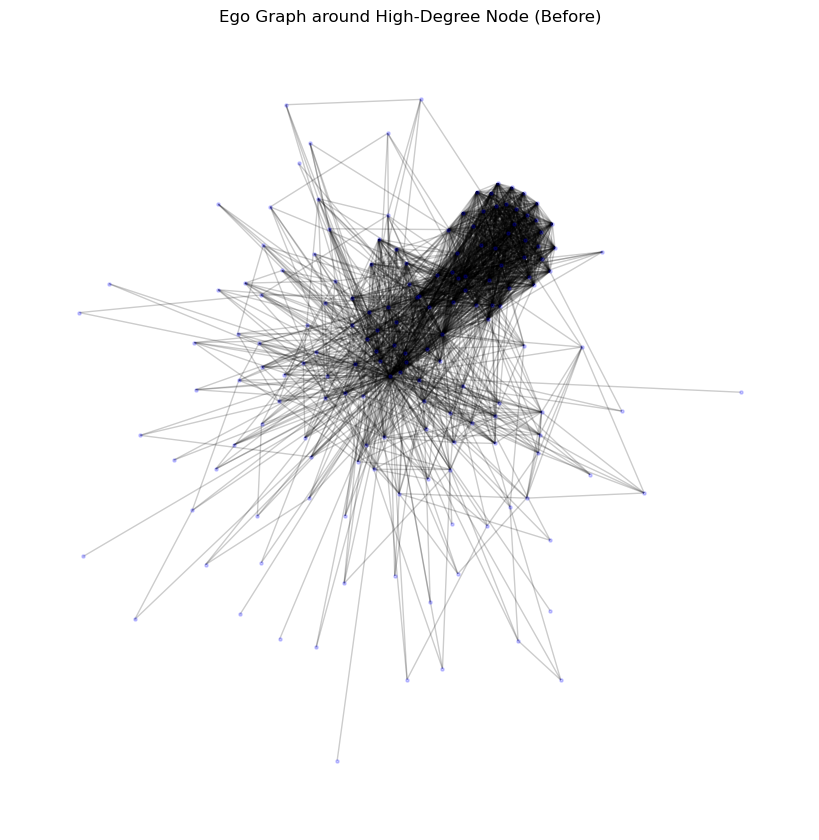

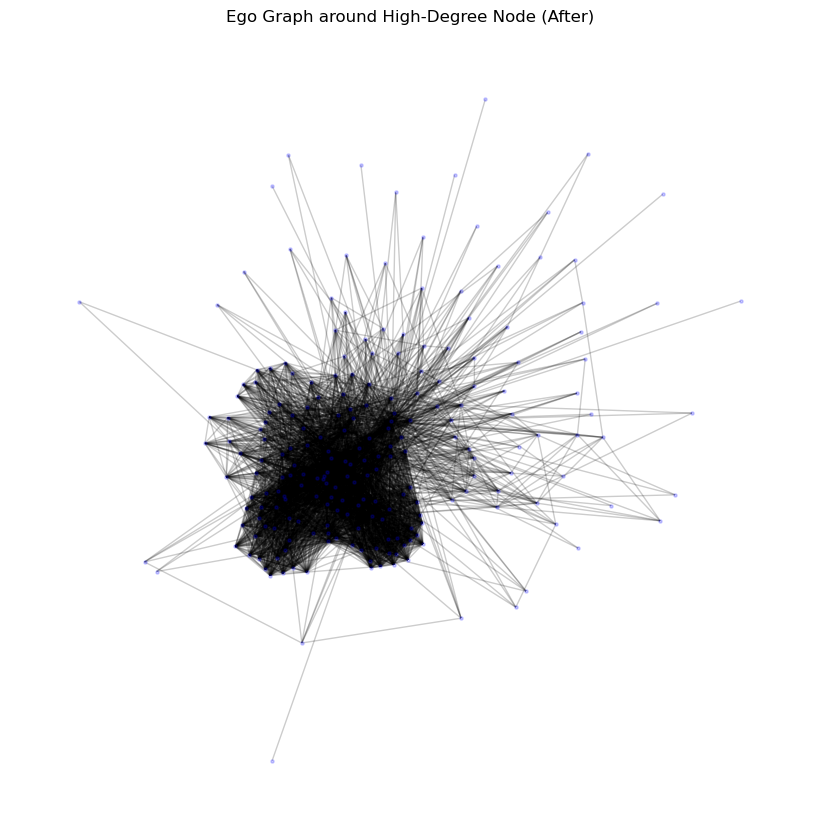

In [39]:
import matplotlib.pyplot as plt

def visualize_ego_graph(ego_graph, title):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(ego_graph)
    # nx.draw(ego_graph, pos, node_size=50, node_color='blue', with_labels=True, font_size=10, font_weight='bold', alpha=0.8)
    nx.draw(ego_graph, pos, node_size=5, node_color='blue', with_labels=False, alpha=0.2)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Visualize the ego graph for the 'before' graph
visualize_ego_graph(ego_before, "Ego Graph around High-Degree Node (Before)")

# Visualize the ego graph for the 'after' graph
visualize_ego_graph(ego_after, "Ego Graph around High-Degree Node (After)")


In [40]:
def list_node_attribute_keys(G):
    node_attr_keys = set()
    for _, attrs in G.nodes(data=True):
        node_attr_keys.update(attrs.keys())
    return node_attr_keys

# Example: List unique attribute keys for nodes in G_before
node_attributes_before = list_node_attribute_keys(G_before)
print("Node Attributes:", node_attributes_before)


Node Attributes: {'liveness', 'eigenvector_centrality', 'danceability', 'clustering_coefficient', 'chart_hits', 'acousticness', 'loudness', 'genres', 'tempo', 'speechiness', 'energy', 'closeness_centrality', 'degree_centrality', 'duration_ms', 'instrumentalness', 'betweenness_centrality', 'mode', 'key', 'valence'}


In [41]:
def list_edge_attribute_keys(G):
    edge_attr_keys = set()
    for _, _, attrs in G.edges(data=True):
        edge_attr_keys.update(attrs.keys())
    return edge_attr_keys

# Example: List unique attribute keys for edges in G_before
edge_attributes_before = list_edge_attribute_keys(G_before)
print("Edge Attributes:", edge_attributes_before)


Edge Attributes: {'weight'}


# Save the graph

In [44]:
def convert_list_attributes_to_string(G):
    for node, attrs in G.nodes(data=True):
        for key, value in attrs.items():
            if isinstance(value, list):
                G.nodes[node][key] = str(value)
    for u, v, attrs in G.edges(data=True):
        for key, value in attrs.items():
            if isinstance(value, list):
                G.edges[u, v][key] = str(value)

In [45]:
convert_list_attributes_to_string(G_before)
convert_list_attributes_to_string(G_after)

In [46]:
# Save the graph to a file
nx.write_graphml(G_before, "G_before.graphml")
nx.write_graphml(G_after, "G_after.graphml")

### How to Load the graph

In [ ]:
# G_before = nx.read_graphml("G_before.graphml")
# G_after = nx.read_graphml("G_after.graphml")